In [73]:
import warnings
from glob import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter(action="ignore", category=FutureWarning)

In [74]:
def wrangle(filepath):
    # Read csv file into DataFrame
    df = pd.read_csv(filepath)
    # Subset data: Apartments in "Distrito Federal"
    mask_ba = df["place_with_parent_names"].str.contains("Distrito Federal")
    mask_apt = df["property_type"] == "apartment"
    mask_price = df["price_aprox_usd"] < 400_000
    df = df[mask_ba & mask_apt & mask_price]
    # Split "lat-lon" column
    df[["lat", "lon"]] = df["lat-lon"].str.split(",", expand=True).astype(float)
    df.drop(columns=["lat-lon"], inplace=True)
    # Get place name
    df["neighborhood"] = df["place_with_parent_names"].str.split("|", expand=True)[1]
    df.drop(columns="place_with_parent_names", inplace=True)
    # Drop columns with over 50% null values
    df = df.drop(columns=["floor", "rooms", "expenses"])
    # Drop leaky columns
    df = df.drop(columns=["price", "price_aprox_local_currency", "price_usd_per_m2", "price_per_m2", "surface_total_in_m2"])
    # Drop low- and high-cardinality categorical variables
    df = df.drop(columns=["operation", "property_type", "currency", "properati_url"], axis=1)
    # Drop NaN values for column "price_aprox_usd"
    df.dropna(subset=["price_aprox_usd"], inplace=True)
    
    return df

In [75]:
files = glob("data/mexico-city-real-estate-*.csv")
df_all = [wrangle(i) for i in files]

In [76]:
df = pd.concat(df_all)

In [77]:
df.head()

,price_aprox_usd,surface_covered_in_m2,lat,lon,neighborhood
0,289775.66,54.0,23.634501,-102.552788,Miguel Hidalgo
2,48822.82,100.0,19.279771,-99.234597,Tlalpan
3,337720.36,135.0,23.634501,-102.552788,Miguel Hidalgo
5,232663.51,87.0,19.432657,-99.177444,Miguel Hidalgo
6,166001.78,100.0,19.367025,-99.170349,Benito Juárez


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11799 entries, 0 to 4627
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        11799 non-null  float64
 1   surface_covered_in_m2  11275 non-null  float64
 2   lat                    10875 non-null  float64
 3   lon                    10875 non-null  float64
 4   neighborhood           11799 non-null  object 
dtypes: float64(4), object(1)
memory usage: 553.1+ KB


In [79]:
# Data missing rate
df.isnull().sum() / len(df)

price_aprox_usd          0.000000
surface_covered_in_m2    0.044411
lat                      0.078312
lon                      0.078312
neighborhood             0.000000
dtype: float64

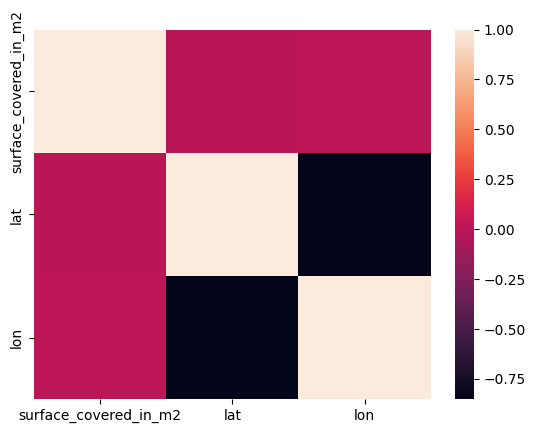

In [80]:
corr = df.select_dtypes("number").drop(columns="price_aprox_usd").corr()
sns.heatmap(corr);

In [81]:
df["neighborhood"].value_counts()

neighborhood
Benito Juárez             3188
Cuauhtémoc                1809
Álvaro Obregón            1227
Miguel Hidalgo            1044
Coyoacán                   702
Iztapalapa                 632
Azcapotzalco               588
Gustavo A. Madero          545
Venustiano Carranza        518
Iztacalco                  426
Tlalpan                    426
Cuajimalpa de Morelos      348
Tláhuac                    232
La Magdalena Contreras      58
Xochimilco                  56
Name: count, dtype: int64

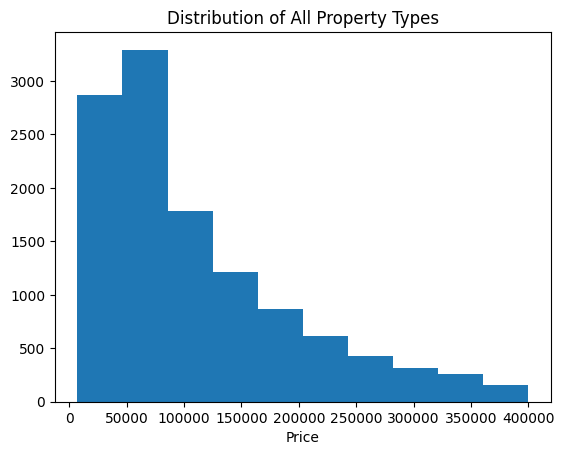

In [82]:
plt.hist(df["price_aprox_usd"])
plt.xlabel("Price")
plt.title("Distribution of All Property Types");

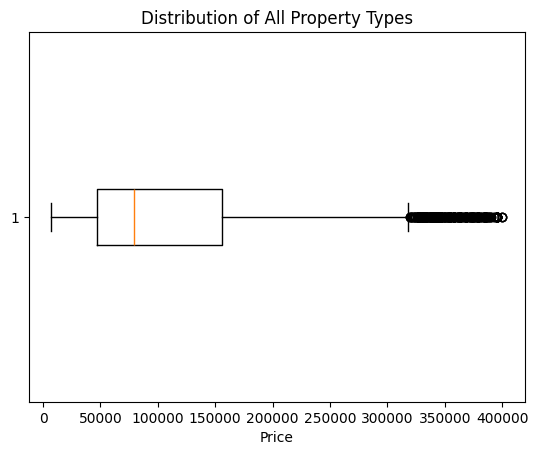

In [83]:
plt.boxplot(df["price_aprox_usd"], vert=False)
plt.xlabel("Price")
plt.title("Distribution of All Property Types");

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11799 entries, 0 to 4627
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        11799 non-null  float64
 1   surface_covered_in_m2  11275 non-null  float64
 2   lat                    10875 non-null  float64
 3   lon                    10875 non-null  float64
 4   neighborhood           11799 non-null  object 
dtypes: float64(4), object(1)
memory usage: 553.1+ KB


In [85]:
df.to_csv("data/mexico-city-real-estate.csv", index=False)